In [8]:
import numpy as np
import ot
from pathlib import Path
import random
import matplotlib.pyplot as plt
import cv2

In [10]:
!pip uninstall cv2

In [9]:
# Load images 
# Define path to the data directory
data_dir = Path('/Users/carollong/Desktop/OptimalTransport/Pneumonia/Data1/')

# CT images with Covid
covid = data_dir / 'CT_COVID'

# CT images without Covid
noncovid = data_dir / 'CT_NonCOVID'

# Get the list of all the images
covid_ct = [f for f in covid.glob("*.*")]
noncovid_ct = [f for f in noncovid.glob("*.*")]

# Two empty lists. We will insert the data into this list in (img_path, label) format
covid_images = []
noncovid_images = []

# Go through all the covid cases. Save distributions in list
for img in covid_ct:
    tempdir = str(img)
    temp = plt.imread(tempdir, 0)
    #convert to greyscale
    if len(temp.shape)>2:
        temp = temp[:,:,2]
    #!! what method is it using
    temp = cv2.resize(temp, (200,200))
    #get dist
    temp = temp / np.sum(temp)
    covid_images.append(temp)

# Go through all the noncovid cases. Save distributions in list
for img in noncovid_ct:
    tempdir = str(img)
    temp = plt.imread(tempdir, 0)
    #convert to greyscale
    if len(temp.shape)>2:
        temp = temp[:,:,2]
    temp = cv2.resize(temp, (200,200))
    #get dist
    temp = temp / np.sum(temp)
    noncovid_images.append(temp)

# Shuffle lists
random.shuffle(covid_images)
random.shuffle(noncovid_images)

print(len(covid_images))
print(len(noncovid_images))

AttributeError: module 'cv2' has no attribute 'resize'

In [3]:
#mean euclidean covid
covid_sum = np.zeros((200,200))
for img in covid_images:
    covid_sum += img
covid_sum /= len(covid_images)
plt.imshow(covid_sum)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


AttributeError: module 'pylab' has no attribute 'imshow'

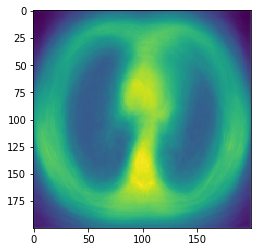

In [5]:
#mean euclidean non-covid
noncovid_sum = np.zeros((200,200))
for img in noncovid_images:
    noncovid_sum += img
noncovid_sum /= len(noncovid_images)
plt.imshow(noncovid_sum)

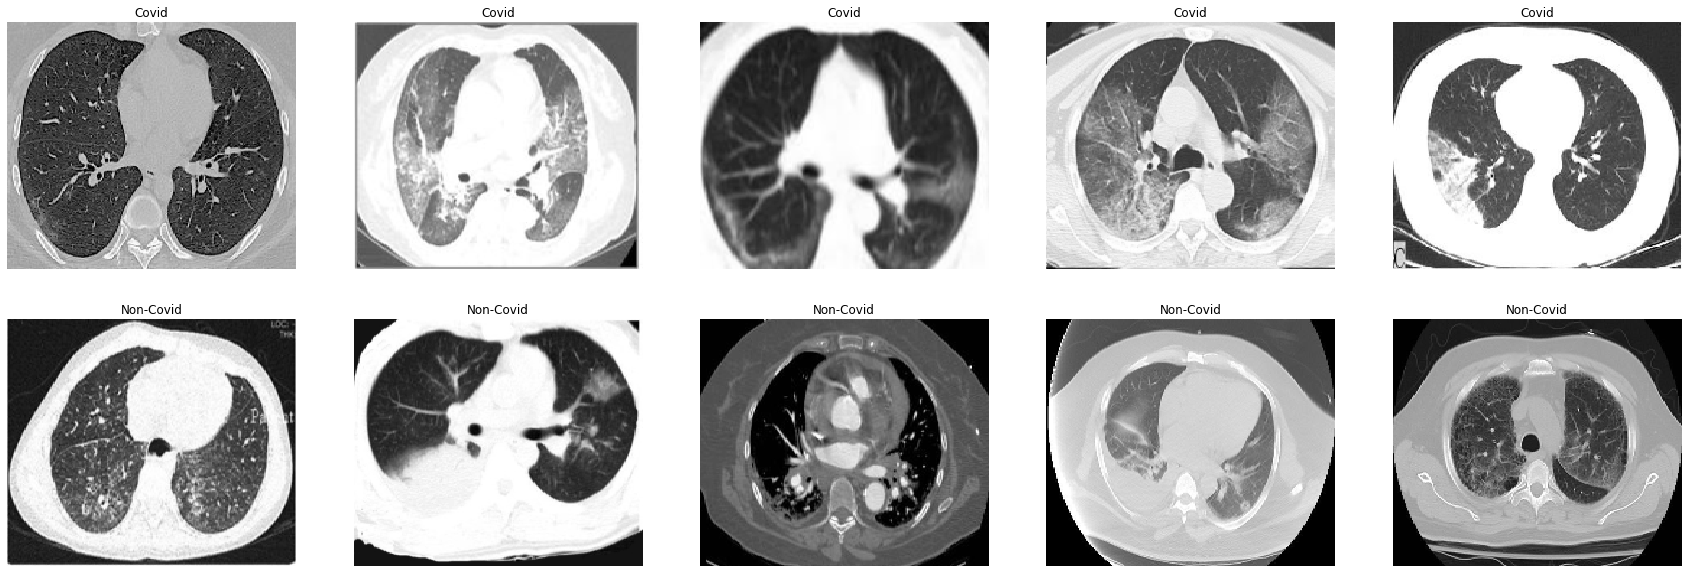

In [5]:
# Plot some data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(5):
    img = covid_images[i]
    ax[i//5, i%5].imshow(img, cmap='gray')
    ax[i//5, i%5].set_title("Covid")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
for i in range(5,10):
    img = noncovid_images[i]
    ax[i//5, i%5].imshow(img, cmap='gray')
    ax[i//5, i%5].set_title("Non-Covid")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [6]:
#convert to np to prepare for model training
covid_images = np.array(covid_images)
noncovid_images = np.array(noncovid_images)

# Split into training/validation/testing for each. (arbitrary split, roughly 4:1:2)
training_covid = covid_images[0:201]
validation_covid = covid_images[201: 249]
testing_covid = covid_images[249:349]

training_non = noncovid_images[0:226]
validation_non = noncovid_images[226:281]
testing_non = noncovid_images[281:397]
# print(len(training_covid[0]))
# print(len(training_non))

In [7]:
print(training_covid.shape)

(201, 200, 200)


In [8]:
# regularization parameter
reg = 0.004
examples = len(training_covid)
weights = [1/examples for i in range(examples)]
X = ot.bregman.convolutional_barycenter2d(training_covid, reg, weights)

In [9]:
print(X.shape)

(200, 200)


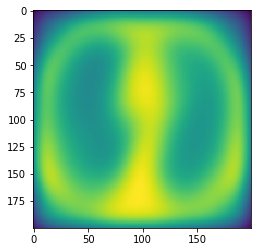

In [10]:
pl.imshow(X)

In [8]:
N = len(training_covid) 
d = 2
measures_locations = []
measures_weights = []
mylist = []
for i in range(200):
    for j in range(200):
        mylist.append([i,j])
for i in range(N):
    measures_locations.append(np.array(mylist))

for i in range(N):
    measures_weights.append(np.array(training_covid[i].flatten()))


In [9]:
print(measures_weights)

[array([1.18960175e-05, 1.18960175e-05, 1.15183661e-05, ...,
       1.20848432e-05, 1.22736688e-05, 1.18960175e-05]), array([7.31587408e-06, 7.80359902e-06, 7.80359902e-06, ...,
       4.08063199e-05, 3.86928451e-05, 2.38985220e-05]), array([1.13448143e-05, 4.18885451e-06, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([4.13320835e-06, 4.29853668e-06, 3.96788001e-06, ...,
       0.00000000e+00, 4.95985001e-07, 4.16627401e-05]), array([3.78666775e-05, 3.78666775e-05, 3.78666775e-05, ...,
       1.21767355e-05, 1.15827484e-05, 1.36617033e-05])]


In [17]:
# barycenters for covid
k = 50  # number of Diracs of the barycenter, number of pixels
d = 2
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)
X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b, numItermax = 500)

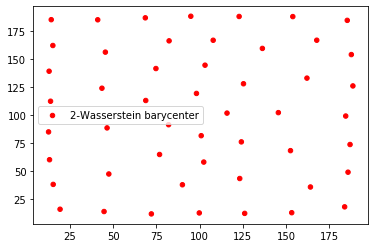

In [18]:
pl.figure(3)
pl.scatter(X[:, 1], X[:, 0], s=b * 1000, c='red', label='2-Wasserstein barycenter')
pl.legend(loc=0)
pl.show()

In [ ]:
# barycenters for covid
k = 500  # number of Diracs of the barycenter, number of pixels
d = 2
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)
X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b, numItermax = 5000)

In [ ]:
pl.figure(3)
pl.scatter(X[:, 1], X[:, 0], s=b * 1000, c='red', label='2-Wasserstein barycenter')
pl.legend(loc=0)
pl.show()